In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dimensiones de la imagen a crear
ancho = 300
alto = 200

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

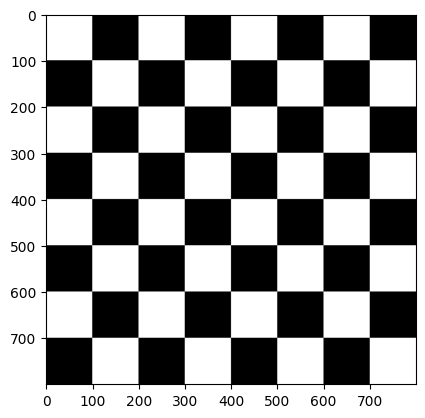

In [3]:
tablero = np.zeros((800,800,1), dtype = np.uint8) 
tablero[0:100,0:100,0] = 255 
tablero[0:100,200:300,0] = 255 
tablero[0:100,400:500,0] = 255 
tablero[0:100,600:700,0] = 255 

tablero[100:200,100:200,0] = 255 
tablero[100:200,300:400,0] = 255 
tablero[100:200,500:600,0] = 255 
tablero[100:200,700:800,0] = 255 

tablero[200:300,0:100,0] = 255 
tablero[200:300,200:300,0] = 255 
tablero[200:300,400:500,0] = 255 
tablero[200:300,600:700,0] = 255  


tablero[300:400,100:200,0] = 255 
tablero[300:400,300:400,0] = 255 
tablero[300:400,500:600,0] = 255 
tablero[300:400,700:800,0] = 255

tablero[400:500,0:100,0] = 255 
tablero[400:500,200:300,0] = 255 
tablero[400:500,400:500,0] = 255 
tablero[400:500,600:700,0] = 255 

tablero[500:600,100:200,0] = 255 
tablero[500:600,300:400,0] = 255 
tablero[500:600,500:600,0] = 255 
tablero[500:600,700:800,0] = 255

tablero[600:700,0:100,0] = 255 
tablero[600:700,200:300,0] = 255 
tablero[600:700,400:500,0] = 255 
tablero[600:700,600:700,0] = 255  

tablero[700:800,100:200,0] = 255 
tablero[700:800,300:400,0] = 255 
tablero[700:800,500:600,0] = 255 
tablero[700:800,700:800,0] = 255
plt.imshow(tablero, cmap='gray') #Te animo a probar a eliminar la especificación del mapa de color plt.show()

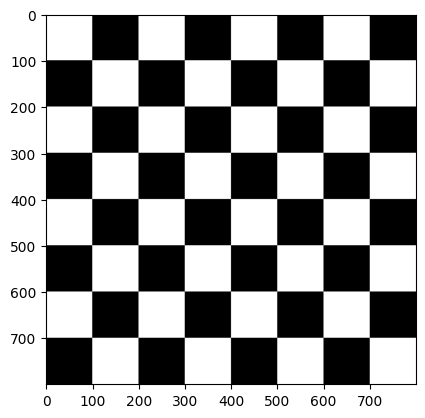

In [5]:
tam = 100  # tamaño de cada casilla

tablero = np.zeros((800, 800, 1), dtype=np.uint8)

for y in range(0, 800, tam):
    for x in range(0, 800, tam):
        # Color blanco si la suma de índices es par, negro si es impar
        if ((x // tam) + (y // tam)) % 2 == 0:
            tablero[y:y+tam, x:x+tam, 0] = 255

plt.imshow(tablero, cmap='gray')
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

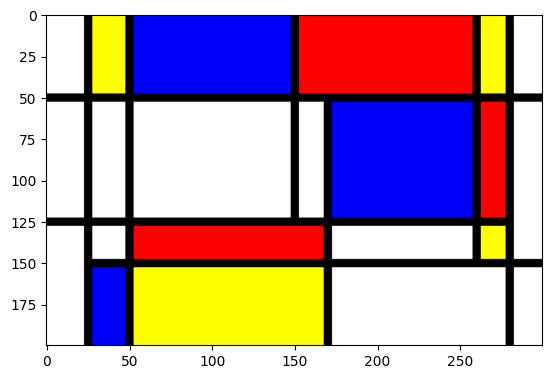

In [6]:
#Crea una imagen con tres planos
colorinchis = np.zeros((alto,ancho,3), dtype = np.uint8)
colorinchis[:,:,0] = 255 
colorinchis[:,:,1] = 255
colorinchis[:,:,2] = 255
#colores
cv2.rectangle(colorinchis,(25,0),(50,50),(255,255,0),-1)
cv2.rectangle(colorinchis,(50,0),(150,50),(0,0,255),-1)
cv2.rectangle(colorinchis,(150,0),(260,50),(255,0,0),-1)
cv2.rectangle(colorinchis,(260,0),(280,50),(255,255,0),-1)
cv2.rectangle(colorinchis,(170,50),(260,125),(0,0,255),-1)
cv2.rectangle(colorinchis,(260,50),(280,125),(255,0,0),-1)
cv2.rectangle(colorinchis,(50,125),(170,150),(255,0,0),-1)
cv2.rectangle(colorinchis,(260,125),(280,150),(255,255,0),-1)
cv2.rectangle(colorinchis,(50,150),(170,int(alto)),(255,255,0),-1)
cv2.rectangle(colorinchis,(25,150),(50,int(alto)),(0,0,255),-1)

#lineas horizontales
cv2.line(colorinchis,(0,50),(int(ancho),50),(0,0,0),3)
cv2.line(colorinchis,(0,125),(280,125),(0,0,0),3)
cv2.line(colorinchis,(25,150),(int(ancho), 150),(0,0,0),3)
#líneas verticales
cv2.line(colorinchis,(int(ancho/2),0),(int(ancho/2), 125),(0,0,0),3)
cv2.line(colorinchis,(25,0),(25,int(alto)),(0,0,0),3)
cv2.line(colorinchis,(50,0),(50,int(alto)),(0,0,0),3)
cv2.line(colorinchis,(170,50),(170,int(alto)),(0,0,0),3)
cv2.line(colorinchis,(260,0),(260,150),(0,0,0),3)
cv2.line(colorinchis,(280,0),(280,int(alto)),(0,0,0),3)

plt.imshow(colorinchis) 
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [7]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape

        # Ejemplo: invertir el plano verde
        g = 255 - g

        # Crear imágenes RGB para mostrar cada canal en color real
        red_image   = np.zeros_like(frame) # crea arreglo con todos los valores en 0(canal = 0)
        red_image[:,:,2] = r

        green_image = np.zeros_like(frame)
        green_image[:,:,1] = g

        blue_image  = np.zeros_like(frame)
        blue_image[:,:,0] = b

        # Concatenar horizontalmente los tres planos en color
        collage = np.hstack((red_image, green_image, blue_image))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [8]:
import cv2
import numpy as np

vid = cv2.VideoCapture(0)
k = 8  # tamaño del bloque

while True:
    ret, frame = vid.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # convertir a escala de grises
    h, w = gray.shape # tamaño imagen

    max_val = -1     # valor máximo encontrado
    min_val = 1e9    # valor mínimo encontrado
    max_tl = (0, 0)  # esquina sup. izq. del bloque más claro
    min_tl = (0, 0)  # esquina sup. izq. del bloque más oscuro

    # recorrer la imagen en pasos de tamaño k
    for y in range(0, h - k, k):
        for x in range(0, w - k, k):
            bloque = gray[y:y+k, x:x+k]
            valor = np.sum(bloque)   # suma de intensidades en el bloque

            if valor > max_val: # comparamos las sumas del bloque claro con los valores guardados
                max_val = valor
                max_tl = (x, y)
            if valor < min_val: # comparamos las sumas del bloque oscuro con los valores guardados
                min_val = valor
                min_tl = (x, y)

    # Dibujar rectángulos en los bloques detectados
    cv2.rectangle(frame, max_tl, (max_tl[0] + k, max_tl[1] + k), (0, 255, 0), 2)  # más claro
    cv2.rectangle(frame, min_tl, (min_tl[0] + k, min_tl[1] + k), (0, 0, 255), 2)  # más oscuro

    cv2.imshow('Zonas 8x8 claras y oscuras', frame)

    if cv2.waitKey(20) == 27:  # ESC para salir
        break

vid.release()
cv2.destroyAllWindows()


TAREA: LLevar a cabo una propuesta propia de pop art

In [9]:
import cv2
import numpy as np

# Abrir cámara
vid = cv2.VideoCapture(0)

# Número de celdas
ncells = 12
off = int(ncells/2) # centrar círulo dentro de su celda

# Paleta Pop Art saturada (BGR)
PALETTE = [(0,255,255), (0,0,255), (255,0,255), (255,0,0)]
# amarillo, rojo, magenta, azul

# Cada círculo se coloreará con el color más cercano de PALETTE
def nearest_color(avg_bgr, palette):
    # 'np.array(avg_bgr)-np.array(c)': resta los valores BGR del color promedio con cada color de la paleta obtiene vector de diferencia
    # 'np.linalg.norm(...)': calcula distancia euclidiana entre los colores "que tan lejos está el color promedio de cada color de la paleta"
    # 'for c in palette': para cada color de la paleta creando una lista de distancias
    dists = [np.linalg.norm(np.array(avg_bgr)-np.array(c)) for c in palette]
    return palette[np.argmin(dists)] # devuelve el color más cercano(argim)

while True:      
    ret, frame = vid.read() 
    if ret: # si la captura fue exitosa
        h, w, c = frame.shape # obtener dimensiones del frame(imagen de la cámara)
        # Reducir resolución según ncells
        down_frame = cv2.resize(frame, (w//ncells, h//ncells), cv2.INTER_NEAREST)
        h2, w2, c2 = down_frame.shape # nuevas dimensiones

        # Crear imagen en blanco donde se dibujarán los círculos
        comic_frame = np.ones((h2*ncells, w2*ncells, 3), dtype=np.uint8) * 255

        # Recorrer cada celda de la imagen reducida
        for y in range(h2):
            for x in range(w2):
                block = down_frame[y,x] # color promedio de la celda
                color = nearest_color(block, PALETTE) # color de la paleta más cercano

                # Intensidad promedio de la celda
                intensidad = int(np.mean(block))
                
                # Radio proporcional con curva para más dinamismo;
                # (zonas claras → círculos grandes, zonas oscuras → círculos pequeños)
                rmax = ncells // 2 # radio máximo de cada celda
                radius = int(2 + (intensidad/255.0)**0.7 * (rmax-2))
                
                # Calcular centro del círculo en la celda
                cx = x*ncells + off
                cy = y*ncells + off
                # Círculo relleno con color de paleta
                cv2.circle(comic_frame, (cx,cy), radius, color, -1, lineType=cv2.LINE_AA)
                # Contorno negro fino estilo cómic
                cv2.circle(comic_frame, (cx,cy), radius, (0,0,0), 1, lineType=cv2.LINE_AA)

        cv2.imshow('Pop Art', comic_frame)

    if cv2.waitKey(20) & 0xFF == 27:  # ESC para salir
        break

# Libera y cierra ventanas de la cámara
vid.release()
cv2.destroyAllWindows()
